<a href="https://colab.research.google.com/github/Harshita3112/Harshi3120/blob/main/recognition_of_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


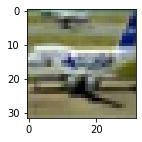

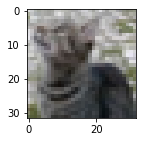

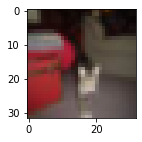

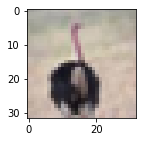

In [ ]:
for i in range(332,336):
    plt.subplots(figsize=(2,2))
    img = x_train[i]
    plt.imshow(img)
    plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test=x_test/255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
391/391 [==============================] - 538s 1s/step - loss: 1.5721 - accuracy: 0.4218 - val_loss: 1.2016 - val_accuracy: 0.5699
Epoch 2/10
391/391 [==============================] - 539s 1s/step - loss: 1.1086 - accuracy: 0.6056 - val_loss: 0.9149 - val_accuracy: 0.6837
Epoch 3/10
391/391 [==============================] - 539s 1s/step - loss: 0.9145 - accuracy: 0.6790 - val_loss: 0.8261 - val_accuracy: 0.7058
Epoch 4/10
391/391 [==============================] - 540s 1s/step - loss: 0.8075 - accuracy: 0.7157 - val_loss: 0.7300 - val_accuracy: 0.7448
Epoch 5/10
391/391 [==============================] - 540s 1s/step - loss: 0.7215 - accuracy: 0.7469 - val_loss: 0.7052 - val_accuracy: 0.7548
Epoch 6/10
391/391 [==============================] - 545s 1s/step - loss: 0.6471 - accuracy: 0.7740 - val_loss: 0.7103 - val_accuracy: 0.7537
Epoch 7/10
391/391 [==============================] - 542s 1s/step - loss: 0.6009 - accuracy: 0.7878 - val_loss: 0.6766 - val_accuracy: 0.7666